In [1]:
# imports

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

from src.utils import sulamerica 

In [2]:
# import module with functions for the analysis, load data and do first cleaninf
sl = sulamerica.Sulamerica()

df = sl.read_data('../data/cases_internacao_SUS.xls')
df = sl.rename_data(df)
df = df[df['AIH_aprovadas']>0]

df.head()

,Região/Unidade da Federação,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,sheet_name,period,Regiao
0,Região Norte,75363.0,75363.0,65821821.59,50592273.10,282125,-,14820122.53,-,-,873.40,873.40,358202.0,4.8,2149.0,2.85,jul19,2019-07,NORTE_TOTAL
1,Rondônia,9603.0,9603.0,9404751.41,7666945.90,-,-,1737805.51,-,-,979.36,979.36,53043.0,5.5,315.0,3.28,jul19,2019-07,NORTE
2,Amazonas,16248.0,16248.0,15624312.73,12166634.07,1221.31,-,3455637.92,-,-,961.61,961.61,85512.0,5.3,536.0,3.30,jul19,2019-07,NORTE
3,Roraima,4324.0,4324.0,3137537.40,2356231.68,-,-,781305.72,-,-,725.61,725.61,25560.0,5.9,171.0,3.95,jul19,2019-07,NORTE
4,Pará,34774.0,34774.0,28178633.44,21241354.07,248197,-,6581738.70,-,-,810.34,810.34,138135.0,4.0,832.0,2.39,jul19,2019-07,NORTE


In [3]:
df.dtypes

Região/Unidade da Federação       object
Internações                      float64
AIH_aprovadas                    float64
Valor_total                      float64
Valor_serviços_hospitalares      float64
Val_serv_hosp_-_compl_federal     object
Val_serv_hosp_-_compl_gestor      object
Valor_serviços_profissionais     float64
Val_serv_prof_-_compl_federal     object
Val_serv_prof_-_compl_gestor      object
Valor_médio_AIH                  float64
Valor_médio_intern               float64
Dias_permanência                 float64
Média_permanência                float64
Óbitos                           float64
Taxa_mortalidade                 float64
sheet_name                        object
period                            object
Regiao                            object
dtype: object

In [4]:
# transform some variables to correct type
df['Val_serv_hosp_-_compl_federal'] = pd.to_numeric(df['Val_serv_hosp_-_compl_federal'], errors='coerce')
df['Val_serv_hosp_-_compl_gestor'] = pd.to_numeric(df['Val_serv_hosp_-_compl_gestor'], errors='coerce')

df['Val_serv_prof_-_compl_federal'] = pd.to_numeric(df['Val_serv_prof_-_compl_federal'], errors='coerce')
df['Val_serv_prof_-_compl_gestor'] = pd.to_numeric(df['Val_serv_prof_-_compl_gestor'], errors='coerce')
df = df.fillna(0)

In [5]:
#add some variables and keep only relevant ones
df['hospitalar_total'] = (df['Valor_serviços_hospitalares'] + df['Val_serv_hosp_-_compl_federal'] + df['Valor_serviços_hospitalares'])
df['servicos_total'] = (df['Val_serv_prof_-_compl_federal'] + df['Val_serv_prof_-_compl_gestor'] + df['Valor_serviços_profissionais'])
df['calculado_total'] = df['hospitalar_total'] + df['servicos_total']
df['percentual_servicos'] = df['servicos_total'] / df['calculado_total']
df['percentual_hospitalar'] = df['hospitalar_total'] / df['calculado_total']
df = df[['period', 'Região/Unidade da Federação', 'Internações', 'AIH_aprovadas',
       'Valor_total', 'Valor_médio_AIH', 'Valor_médio_intern',
       'Dias_permanência', 'Média_permanência', 'Óbitos', 'Taxa_mortalidade',
        'Regiao', 'hospitalar_total', 'servicos_total',
       'calculado_total', 'percentual_servicos', 'percentual_hospitalar']]


In [6]:
df.columns

Index(['period', 'Região/Unidade da Federação', 'Internações', 'AIH_aprovadas',
       'Valor_total', 'Valor_médio_AIH', 'Valor_médio_intern',
       'Dias_permanência', 'Média_permanência', 'Óbitos', 'Taxa_mortalidade',
       'Regiao', 'hospitalar_total', 'servicos_total', 'calculado_total',
       'percentual_servicos', 'percentual_hospitalar'],
      dtype='object')

# EDA

O primeiro passo será conduzir uma análise exploratória para observar o comportamento das variáveis e extrair alguns insights.
A primeira coisa que vamos fazer é um sanity check para ver se não temos nenhum dados faltando e depois explorar a evolução das principais variáveis no período e tentar entender se existe alguma .


In [7]:
df['period'].sort_values().value_counts()

2017-12    33
2018-04    33
2019-06    33
2019-04    33
2018-09    33
2018-08    33
2018-07    33
2018-05    33
2019-02    33
2018-11    33
2019-01    33
2018-03    33
2018-12    33
2019-07    32
Name: period, dtype: int64

In [8]:
df['Região/Unidade da Federação'].value_counts()

Minas Gerais           14
Bahia                  14
Pará                   14
Mato Grosso do Sul     14
Mato Grosso            14
Piauí                  14
Paraná                 14
Maranhão               14
Amazonas               14
Região Sul             14
Rondônia               14
Roraima                14
Região Sudeste         14
Alagoas                14
Região Nordeste        14
Sergipe                14
São Paulo              14
Rio Grande do Sul      14
Região Centro-Oeste    14
Tocantins              14
Amapá                  14
Distrito Federal       14
Pernambuco             14
Região Norte           14
Ceará                  14
Santa Catarina         14
Rio Grande do Norte    14
Total                  14
Rio de Janeiro         14
Goiás                  14
Paraíba                14
Espírito Santo         14
Acre                   13
Name: Região/Unidade da Federação, dtype: int64

In [9]:
df['period'].sort_values().unique()

array(['2017-12', '2018-03', '2018-04', '2018-05', '2018-07', '2018-08',
       '2018-09', '2018-11', '2018-12', '2019-01', '2019-02', '2019-04',
       '2019-06', '2019-07'], dtype=object)

Como podemos ver esta faltando uma observação para o Estado do Acre no período 2019-07. Dessa forma sabemos que o valor das variáveis da região norte para o período estão subestimados (no caso de variáveis absolutas e.g. internações, valores e etc.). Também podemos ver que temos diversos períodos faltando, de forma que para que seja possível estimar um modelo, teremos que inputar esses períodos.

Agora Vamos ver a evolução de algumas variáveis. Primeiro vamos olhas em um nível mais macro.

In [10]:
df = sl.add_period_data(df)

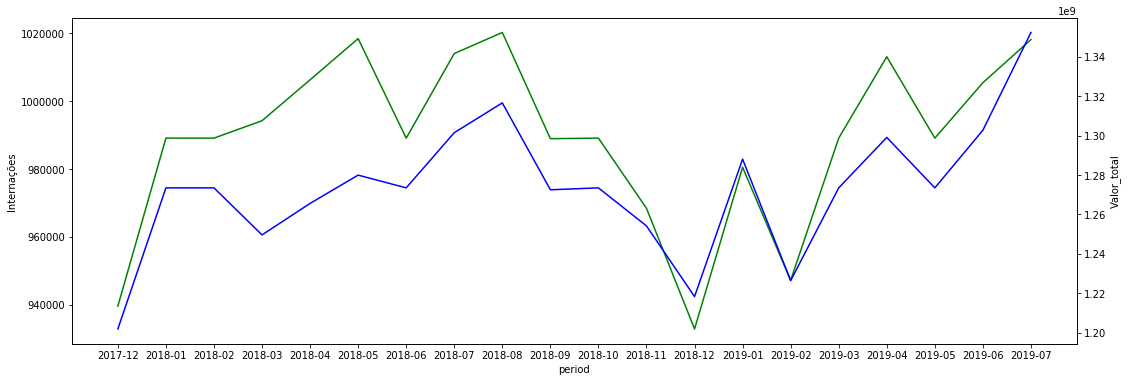

In [11]:

temp_df = df[df['Região/Unidade da Federação']=='Total'].sort_values(by=['period'])

temp_df['Internações'] = temp_df['Internações'].fillna((temp_df['Internações'].mean()))
temp_df['Valor_total'] = temp_df['Valor_total'].fillna((temp_df['Valor_total'].mean()))


plt.figure(figsize=(18, 6))
sns.lineplot(x='period', y='Internações', data=temp_df, sort=True, color='g')
ax2 = plt.twinx()
sns.lineplot(x='period', y='Valor_total', data=temp_df,  ax=ax2, sort=True, color='b');


Como esperado existe uma correlação positiva entre o número total de internações e o valor total gasto.


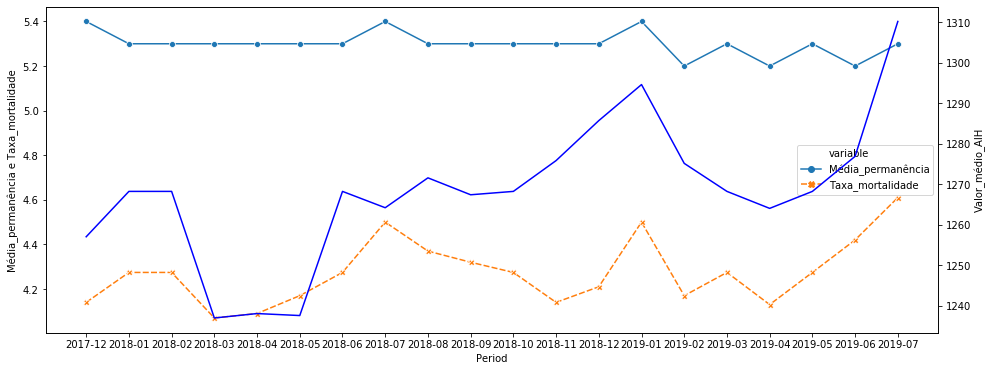

In [12]:
plt.figure(figsize=(16, 6))

temp_df['Média_permanência'] = temp_df['Média_permanência'].fillna((temp_df['Média_permanência'].mean()))
temp_df['Taxa_mortalidade'] = temp_df['Taxa_mortalidade'].fillna((temp_df['Taxa_mortalidade'].mean()))
temp_df['Valor_médio_AIH'] = temp_df['Valor_médio_AIH'].fillna((temp_df['Valor_médio_AIH'].mean()))


melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['Média_permanência', 'Taxa_mortalidade']) 
ax = sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True,style="variable")
ax.set(xlabel='Period', ylabel='Média_permanência e Taxa_mortalidade')
ax2 = plt.twinx()
sns.lineplot(x='period', y='Valor_médio_AIH', data=temp_df,  ax=ax2, sort=True, color='b', markers=True);

A taxa de mortalidade aparentemente vem crescendo levemente. É interessante observar que ocorreu uma queda na média de permanência, especialmente apartir de 2019-02. Outro fato interessante é que mesmo com uma queda na média de permanência o valor médio da AIH vem aumentando constantemente. Pode ser que a composição dos custos (serviços e hospitalar) tenha mudado... Mas, como mostrado no gráfico abaixo, eles permaneceram relativamente constantes no período analisado.

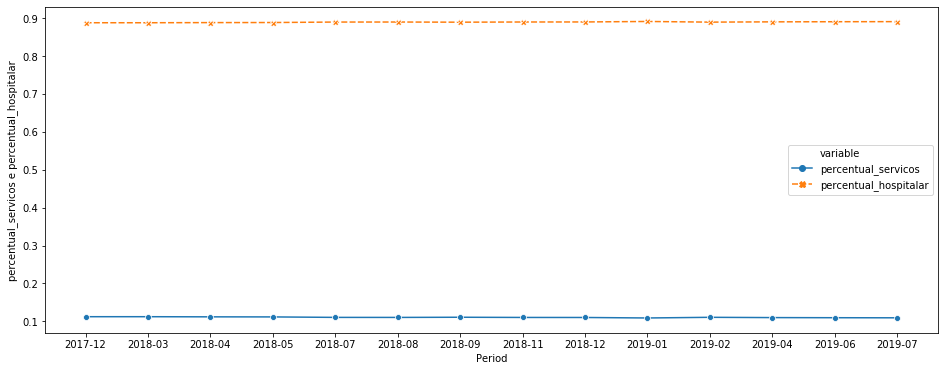

In [13]:
plt.figure(figsize=(16, 6))

melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['percentual_servicos', 'percentual_hospitalar'])
ax = sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True, style="variable")
ax.set(xlabel='Period', ylabel='percentual_servicos e percentual_hospitalar');


Para entender melhor vamos avaliar os dados por região.

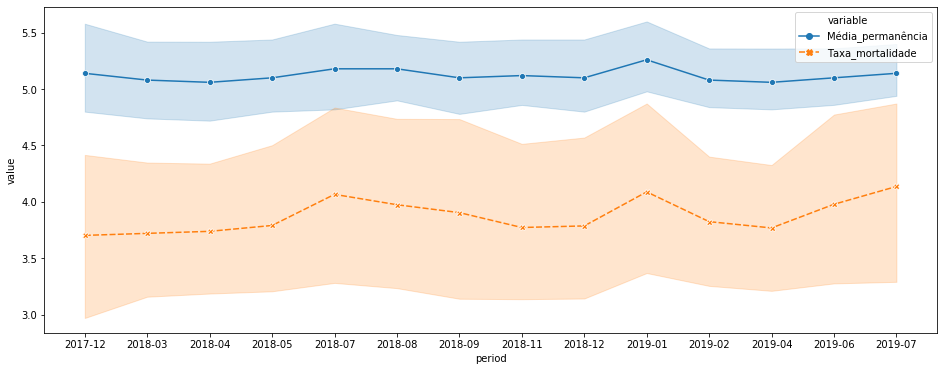

In [14]:
temp_df = df[df['Regiao'].str.contains("_TOTAL",na=False)].sort_values(by=['period'])
melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['Média_permanência', 'Taxa_mortalidade'])
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True,style="variable");


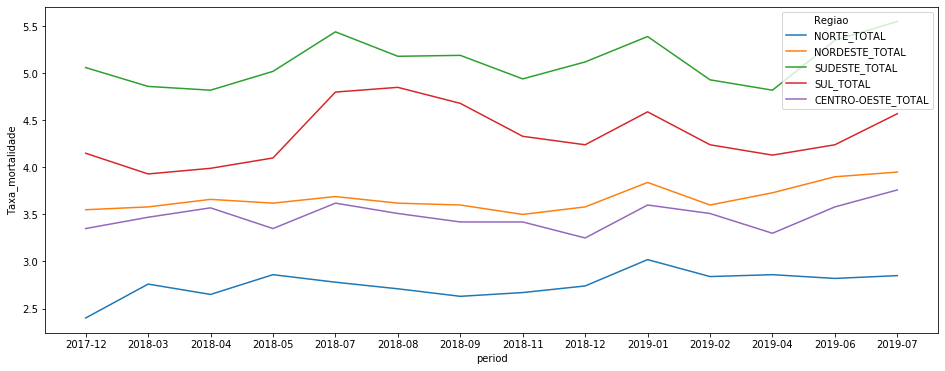

In [15]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='Taxa_mortalidade', data=temp_df, sort=True, hue='Regiao', markers=True);

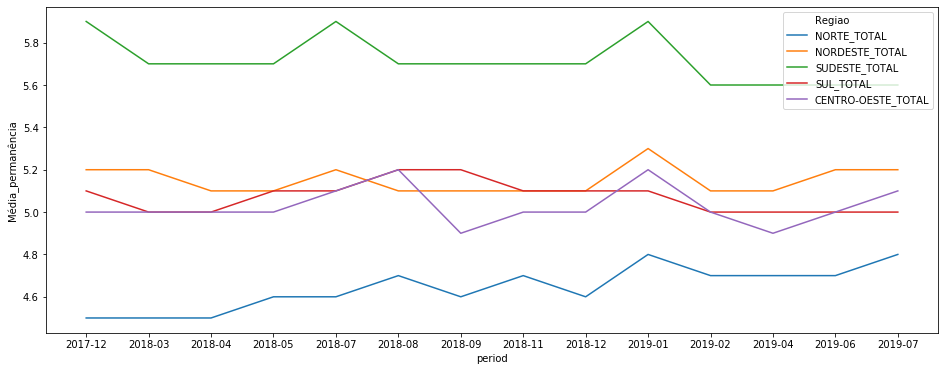

In [16]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='Média_permanência', data=temp_df, sort=True, hue='Regiao', markers=True);

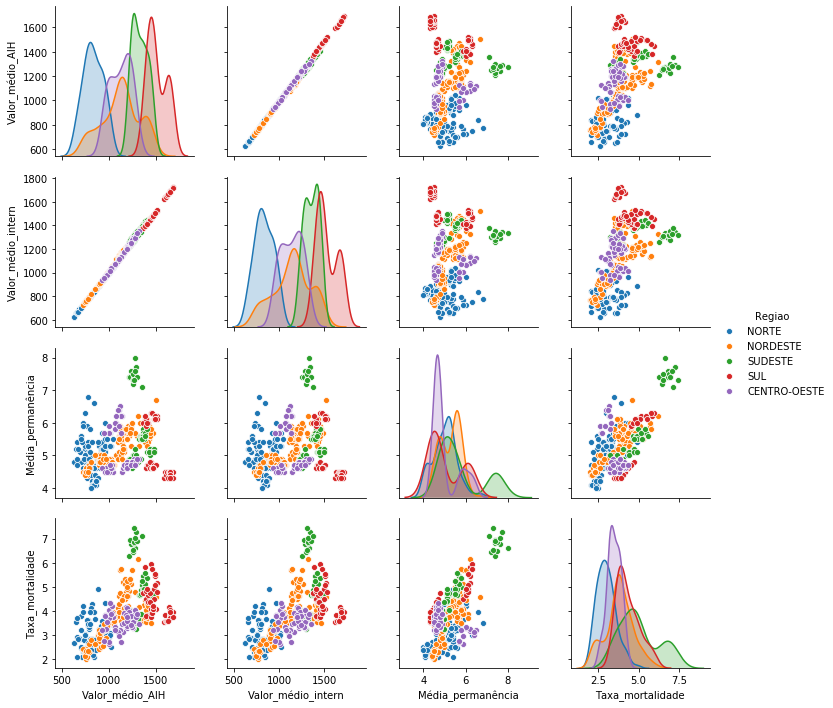

In [17]:
temp_df = df[['Regiao','Valor_médio_AIH', 'Valor_médio_intern',
              'Média_permanência','Taxa_mortalidade']]
temp_df = temp_df[~temp_df['Regiao'].str.contains("TOTAL", na=False)].dropna()
sns.pairplot(data=temp_df, hue='Regiao');

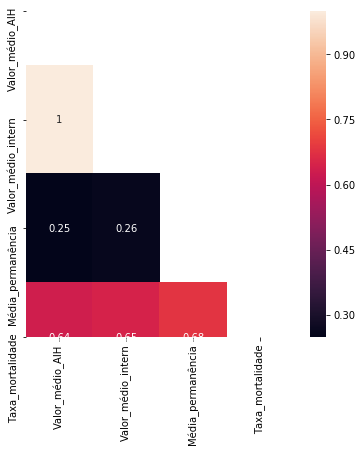

In [18]:
temp_df = df[['Valor_médio_AIH', 'Valor_médio_intern',
              'Média_permanência','Taxa_mortalidade']]

fig, ax = plt.subplots(figsize=(6, 6)) 
mask = np.zeros_like(temp_df.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(temp_df.corr(), mask= mask, ax= ax, annot= True);

Como podemos ver o comportamento entre as regiões é bem diferente, tanto em nível como em tendência. Tal fato indica que talvez seja melhor trabalhar com as séries desagregadas (a nível UF), principalmente para imputar os dados para os períodos que não estão na base.
É possível ver que dentro das regiões também existem comportamentos muito distinto.

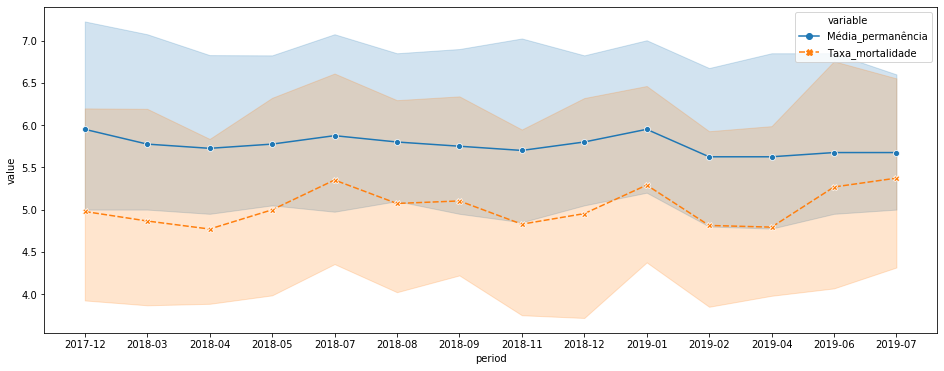

In [19]:
temp_df = df[df['Regiao']=='SUDESTE'].sort_values(by=['period'])
melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['Média_permanência', 'Taxa_mortalidade'])
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True,style="variable");

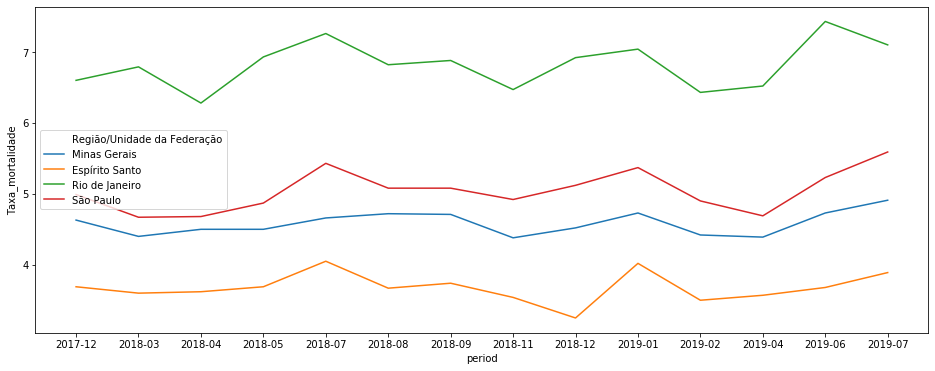

In [20]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='Taxa_mortalidade', data=temp_df, sort=True, hue='Região/Unidade da Federação', markers=True);

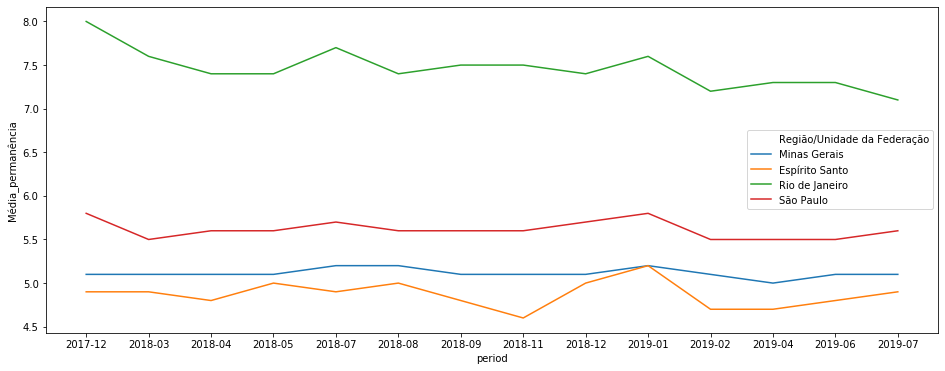

In [21]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='Média_permanência',
             data=temp_df, sort=True,
             hue='Região/Unidade da Federação', markers=True);

# Impute Missing Values
A EDA nos mostrou que as séries de região e UF são muito diferentes (tanto em nível quanto em comportamento). Por isso vamos imputar os dados faltante a nível UF e depois agregar os mesmos para nível região e total.

Quanto a metodologia para realizar o input dos dados faltantes, é importante levar em conta o fator temporal. Sendo assim o ideal seria usar um metodologia que levasse em conta fatores como a sazonalidade e a tendência das séries. Nesse sentido um fator limitante nessa análise é o baixo número de períodos, o que torna inviável estimar/entender o comportamento sazonal. Caso tivessemos mais observações (ou mesmo um modelo estrutural) poderiamos realizar utilizar um filtro de kalman para preencher as observações faltantes. Realizar mean/median imputation não é o ideal nesse caso, justamente por causa que algumas séries possuem tendência e ,aparentemente, sazonalidade. Dado o contexto do problema e as restrições vamos realizar o input dos dados faltantes usando interpolação.

In [22]:
temp_df = df[['Região/Unidade da Federação','period', 'Internações', 
              'AIH_aprovadas','Valor_total', 'Valor_médio_AIH', 
              'Dias_permanência', 'Óbitos', 'hospitalar_total', 'servicos_total']]
recon_df = sl.reconstruct_data(temp_df)

In [23]:
recon_df.head(20)

,Região/Unidade da Federação,period,Internações,AIH_aprovadas,Valor_total,Valor_médio_AIH,Dias_permanência,Óbitos,hospitalar_total,servicos_total,Regiao
20,Acre,2017-12,3463.000000,3487.000000,2610454.550,748.620000,16660.0,106.0,3.932617e+06,644145.900000,NORTE
21,Acre,2018-01,3421.666667,3438.333333,2607781.150,758.726667,16323.0,101.0,3.943611e+06,635975.643333,NORTE
22,Acre,2018-02,3380.333333,3389.666667,2605107.750,768.833333,15986.0,96.0,3.954605e+06,627805.386667,NORTE
23,Acre,2018-03,3339.000000,3341.000000,2602434.350,778.940000,15649.0,91.0,3.965598e+06,619635.130000,NORTE
24,Acre,2018-04,4237.000000,4252.000000,3064163.420,720.640000,19446.0,97.0,4.608375e+06,759975.800000,NORTE
25,Acre,2018-05,3309.000000,3339.000000,2276236.690,681.710000,15859.0,95.0,3.416581e+06,567946.020000,NORTE
26,Acre,2018-06,3625.000000,3648.500000,2701333.285,735.805000,17968.5,111.5,4.108055e+06,647305.695000,NORTE
27,Acre,2018-07,3941.000000,3958.000000,3126429.880,789.900000,20078.0,128.0,4.799529e+06,726665.370000,NORTE
28,Acre,2018-08,3982.000000,4000.000000,2998865.510,749.720000,20032.0,117.0,4.571892e+06,712919.260000,NORTE
29,Acre,2018-09,3698.000000,3709.000000,2619709.860,706.310000,17772.0,140.0,4.023592e+06,607913.890000,NORTE


In [24]:
total_df = recon_df.groupby(['period']).sum().reset_index().sort_values(by=['period'])
total_df['Taxa_mortalidade'] = (total_df['Óbitos']/total_df['Internações'])*100
total_df['calculado_total'] = total_df['servicos_total']+total_df['hospitalar_total']
total_df['media_permanencia'] = total_df['Dias_permanência']/total_df['Internações']
total_df.head()

,period,Internações,AIH_aprovadas,Valor_total,Valor_médio_AIH,Dias_permanência,Óbitos,hospitalar_total,servicos_total,Taxa_mortalidade,calculado_total,media_permanencia
0,2017-12,939601.0,9.560650e+05,1.201828e+09,29946.170000,5.049429e+06,38881.000000,1.906418e+09,2.414567e+08,4.138033,2.147875e+09,5.374014
1,2018-01,957808.0,9.740957e+05,1.217742e+09,29902.183333,5.111821e+06,39417.333333,1.932995e+09,2.448244e+08,4.115369,2.177820e+09,5.336999
2,2018-02,976015.0,9.921263e+05,1.233657e+09,29858.196667,5.174212e+06,39953.666667,1.959573e+09,2.481921e+08,4.093550,2.207765e+09,5.301366
3,2018-03,994222.0,1.010157e+06,1.249571e+09,29814.210000,5.236604e+06,40490.000000,1.986150e+09,2.515599e+08,4.072531,2.237710e+09,5.267037
4,2018-04,1006271.0,1.022183e+06,1.265569e+09,29696.010000,5.305641e+06,41111.000000,2.013321e+09,2.540640e+08,4.085480,2.267385e+09,5.272577


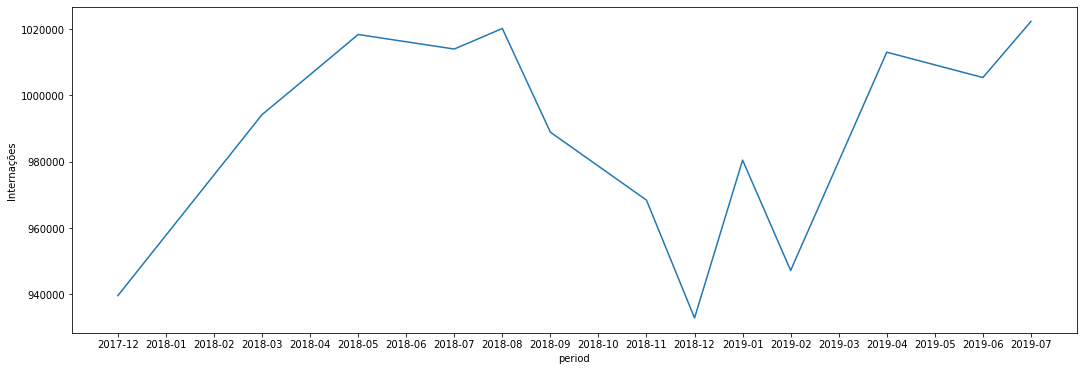

In [29]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='period', y='Internações',
             data=total_df, sort=True,
             markers=True);

In [25]:
regiao_df = recon_df.groupby(['period','Regiao']).sum().reset_index()
regiao_df['Taxa_mortalidade'] = (regiao_df['Óbitos']/regiao_df['Internações'])*100
regiao_df['calculado_total'] = regiao_df['servicos_total']+regiao_df['hospitalar_total']
regiao_df['media_permanencia'] = regiao_df['Dias_permanência']/regiao_df['Internações']
regiao_df.head()

,period,Regiao,Internações,AIH_aprovadas,Valor_total,Valor_médio_AIH,Dias_permanência,Óbitos,hospitalar_total,servicos_total,Taxa_mortalidade,calculado_total,media_permanencia
0,2017-12,CENTRO-OESTE,70277.0,71141.0,8.148492e+07,4487.30,353017.0,2354.0,1.290510e+08,16323532.13,3.349602,1.453746e+08,5.023222
1,2017-12,NORDESTE,249821.0,253377.0,2.813121e+08,10128.59,1301639.0,8859.0,4.376772e+08,61419400.26,3.546139,4.990966e+08,5.210287
2,2017-12,NORTE,80359.0,80383.0,6.726731e+07,5610.02,358295.0,1929.0,1.020220e+08,15702065.31,2.400478,1.177241e+08,4.458679
3,2017-12,SUDESTE,370247.0,380182.0,5.195994e+08,5343.47,2181114.0,18727.0,8.320872e+08,99740037.66,5.057975,9.318273e+08,5.890970
4,2017-12,SUL,168897.0,170982.0,2.521644e+08,4376.79,855364.0,7012.0,4.055805e+08,48271662.89,4.151643,4.538522e+08,5.064412


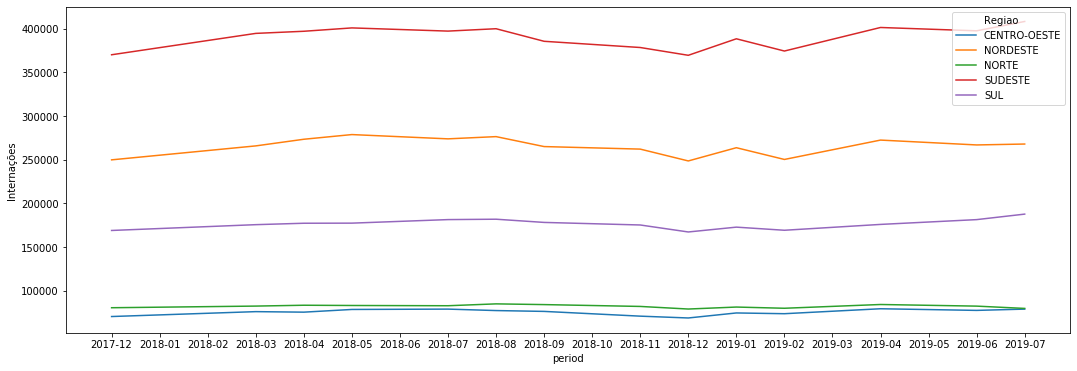

In [30]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='period', y='Internações',
             data=regiao_df, sort=True,
             hue = 'Regiao', markers=True);

# Model